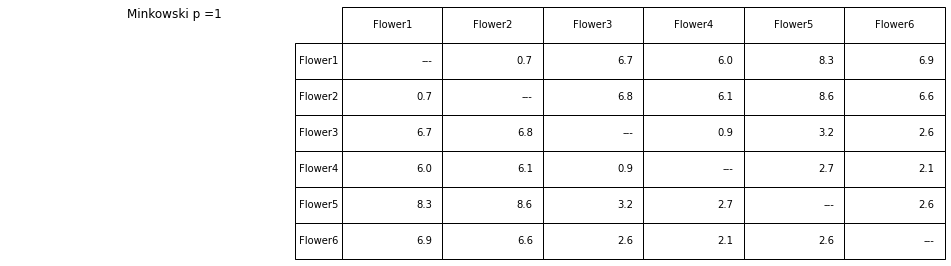

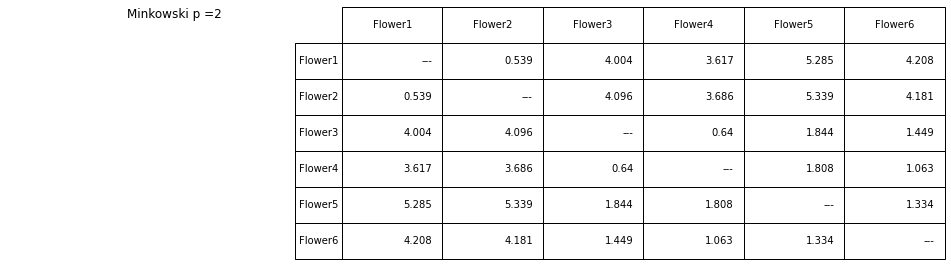

In [2]:
#question-1
import numpy as np
import matplotlib.pyplot as plt
plt.close()
def minkowskiDist(vector1, vector2, power):
    distance = 0.0
    for i in range(len(vector1)):
        distance += abs(vector1[i] - vector2[i])**power
    return distance**(1.0/power)

class Flowers(object):
    def __init__(self, flower_name, flower_features):
        self.flower_name = flower_name
        self.flower_features = np.array(flower_features)
    
    def getName(self):
        return self.flower_name
    
    def getFeatures(self):
        return self.flower_features
    
    def distance(self, other, p):
        return minkowskiDist(self.getFeatures(), other.getFeatures(), p)


def compareFlowers(flowers, precision, power):
    columnLabels = []
    for f in flowers:
        columnLabels.append(f.getName())
    rowLabels = columnLabels[:]
    tableVals = []

    for f1 in flowers:
        row = []
        for f2 in flowers:
            if f1 == f2:
                row.append('---')
            else:
                distance = f1.distance(f2, power)
                row.append(str(round(distance, precision)))
        tableVals.append(row)

        

    plt.title('Minkowski p =' + str(power))
    table = plt.table(rowLabels = rowLabels,
                      colLabels = columnLabels,
                      cellText = tableVals,
                      cellLoc = 'right',
                      loc = 'right',
                      colWidths = [0.3]*len(flowers))
    table.scale(1, 3)
    plt.axis('off')
    plt.show()
flower1 = Flowers("Flower1", [5.1, 3.5, 1.4, 0.2])
flower2 = Flowers("Flower2", [4.9, 3.0, 1.4, 0.2])
flower3 = Flowers("Flower3", [7.0, 3.2, 4.7, 1.4])
flower4 = Flowers("Flower4", [6.4, 3.2, 4.5, 1.5])
flower5 = Flowers("Flower5", [6.3, 3.3, 6.0, 2.5])
flower6 = Flowers("Flower6", [5.8, 2.7, 5.1, 1.9])
flowers = [flower1, flower2, flower3, flower4, flower5, flower6]


compareFlowers(flowers, 3, 1)
compareFlowers(flowers, 3, 2)

In [3]:
#quesrtion-2
import pandas as pd
from datetime import datetime, timedelta
import numpy as np


class Athletes(object):
    def __init__(self, athlete_name, athlete_features):
        self.athlete_name = athlete_name
        self.athlete_features = np.array(athlete_features)
    
    def getName(self):
        return self.athlete_name
    
    def getFeatures(self):
        return self.athlete_features
    
    def distance(self, other, p):
        return minkowskiDist(self.getFeatures(), other.getFeatures(), p)
    
    def _str_(self):
        return self.athlete_name
    
today = datetime.today()
secsInYear = 60 * 60 * 24 * 365.25

df = pd.read_excel('athletes.xlsx')
df['Age'] = today - df['Birthday']
df['BMI'] = df['Weight']/((df['Height']/100)**2)
athletes = []
for i, row in df.iterrows():
    athlete = Athletes(row['Athlete'], 
                      [row['Weight'], row['Height'], \
                       row['Age'].total_seconds()/secsInYear, \
                       row['BMI']]) 
    if i == 0:
        baseline = athlete
        print('Comparing against', athlete.getName())
    else:
        athletes.append(athlete)

diffs = {}
total = 0
count = 0
for athlete in athletes:
    dist =  athlete.distance(baseline, 2)
    diffs[athlete.getName()] = athlete.distance(baseline, 2)
    total += dist
    count += 1
meanDistance = total / count

above=[]
below=[]

for name in diffs:
    if diffs[name] < meanDistance:
        below.append(name)
    else:
        above.append(name)
        
print('Most similar athletes to', baseline)
for athlete in below:
    print('\t', athlete)
print('\nLeast similar athletes to', baseline)
for athlete in above:
    print('\t', athlete)
    
data = pd.read_excel('Athletes.xlsx')
df = pd.DataFrame(data, columns= ['Athlete','Birthday', 'Country', 'Weight', 'Height' ])
df.head()

Comparing against Alberto Bettiol
Most similar athletes to <__main__.Athletes object at 0x7fb6c05cedc0>
	 Alex Howes
	 Dan McLay
	 Daniel Carvajal
	 Eden Hazard
	 Ferland Mendy
	 Gareth Bale
	 James Rodríguez
	 Joe Dombroski
	 Jonathan Caicedo
	 José I. Fernández
	 Lachlan Morton
	 Lawson Craddock
	 Logan Owen
	 Lucas Vázquez
	 Luka Modric
	 Marcelo Vieira da Silva
	 Mariano Díaz
	 Matti Breschel
	 Mike Woods
	 Mitch Docker
	 Moreno Hofland
	 Nate Brown
	 Rigoberto Uran
	 Sacha Modela
	 Sean Bennet
	 Sebastian Langeveld
	 Sep Vanarcke
	 Sergio Ramos
	 Simon Clark
	 Tanel Kangert
	 Tejay van Garderen
	 Toni Kroos

Least similar athletes to <__main__.Athletes object at 0x7fb6c05cedc0>
	 Alphonse  Areola
	 Álvaro Odriozola
	 Brahim Díaz
	 Carlos Henrique Casimiro
	 Dani Martinez
	 Éder Gabriel
	 Federico Valverde
	 Francisco Román  Alarcón
	 Hugh Carthy
	 Jimmy Whelan
	 Julius van der Berg
	 Karim Benzema
	 Luis Villalobos
	 Luka Jović
	 Marco Asensio
	 Raphaël Varane
	 Rodrygo Goes
	 Ser

,Athlete,Birthday,Country,Weight,Height
0,Alberto Bettiol,1980-10-29,Italy,69,180
1,Alex Howes,1988-01-01,USA,65,175
2,Alphonse Areola,1993-02-27,France,94,195
3,Álvaro Odriozola,1995-12-14,Spain,66,176
4,Brahim Díaz,1999-08-03,Spain,68,171


In [4]:
#question-3
import pandas as pd
flights = pd.read_csv("delayed_flights.csv")
flights.head()
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

#question-3 continued:

We can use flight origin and destination of the flights for grouping flights. Since both origin and destination are not numeric values we can use latitude and longitute values of two locations for grouping flights. From the given data we can observe that flights with air system delay, airline delay, arrival delay, late aircraft delay and weather delay are usally getting delayed so these might me the factors behind flight delay and these are also effecting scheduled time, scheduled time and schedule arrival.

In [9]:
#question-4
import scipy.spatial

class Example(object):
    def __init__(self, name, features, label = None):
        self.name = name
        self.features = features
        self.label = label
    
    def dimensionality(self):
        return len(self.features)
    def getFeatures(self):
        return self.features[:]
    def getLabel(self):
        return self.label
    def getName(self):
        return self.name
    def distance(self, other, p=2):
        return scipy.spatial.minkowski_distance(self.features, 
                                                other.features, p)
    def _str_(self):
        return self.name +':'+ str(self.features) + ':' + str(self.label)
import numpy as np

class Cluster(object):
    def __init__(self, examples, exampleType):
        self.examples = examples
        self.exampleType = exampleType
        self.centroid = self.__computeCentroid()
        
    def update(self, examples):
        oldCentroid = self.centroid
        self.examples = examples
        if len(examples) > 0:
            self.centroid = self.__computeCentroid()
            return oldCentroid.distance(self.centroid)
        else:
            return 0.0
        
    def __computeCentroid(self):
        dim = self.examples[0].dimensionality()
        totVals = np.array([0.0]*dim)
        for e in self.examples:
            totVals += e.getFeatures()
        centroid = self.exampleType('centroid', 
                                    totVals/float(len(self.examples)))
        return centroid
    
    def members(self):
        for e in self.examples:
            yield e
            
    def size(self):
        return len(self.examples)
    
    def getCentroid(self):
        return self.centroid
    
    def variance(self):
        totDist = 0.0
        for e in self.examples:
            totDist += (e.distance(self.centroid))**2
        return totDist**0.5
    
    def _str_(self):
        names = []
        for e in self.examples:
            names.append(e.getName())
        names.sort()
        result = 'Cluster with centroid '\
               + str(self.centroid.getFeatures()) + ' contains:\n '
        for e in names:
            result = result + e + ', '
        return result[:-2]

def dissimilarity(clusters):
    totDist = 0.0
    for c in clusters:
        totDist += c.variance()
    return totDist

import random

def kmeans(examples, exampleType, k, verbose=False):
    initialCentroids = random.sample(examples, k)
    clusters = []
    for e in initialCentroids:
        if verbose:
            print('Initial centroid:', e.getName())
        clusters.append(Cluster([e], exampleType))
    if verbose:
        print()
    converged = False
    numIterations = 0
    while not converged:
        numIterations += 1
        newClusters = []
        for i in range(k):
            newClusters.append([])
        
        for e in examples:
            smallestDistance = e.distance(clusters[0].getCentroid())
            index = 0
            for i in range(1, k):
                distance = e.distance(clusters[i].getCentroid())
                if distance < smallestDistance:
                    smallestDistance = distance
                    index = i
            newClusters[index].append(e)
            
        converged = True
        for i in range(len(clusters)):
            if clusters[i].update(newClusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(numIterations))
            for c in clusters:
                print(c)
            print('')
    
    return clusters

def trykmeans(examples, exampleType, numClusters, numTrials, verbose = False):
    best = kmeans(examples, exampleType, numClusters, verbose)
    minDissimilarity = dissimilarity(best)
    trial = 1
    while trial < numTrials:
        try:
            clusters = kmeans(examples, exampleType, numClusters, verbose)
            currDissimilarity = dissimilarity(clusters)
        except:
            continue
        if currDissimilarity < minDissimilarity:
            best = clusters
            minDissimilarity = currDissimilarity
        trial += 1
        
    return best

def buildExamples(flightsDF):
    examples = []
    for i, flight in flightsDF.iterrows():
        featureVec = [flight['SCHEDULED_DEPARTURE'], flight['SCHEDULED_TIME'], 
                     flight['SCHEDULED_ARRIVAL'], 
                      flight['ARRIVAL_DELAY'], flight['AIR_SYSTEM_DELAY'], 
                      flight['AIRLINE_DELAY'],
                      flight['LATE_AIRCRAFT_DELAY'], flight['WEATHER_DELAY']]
        name = flight['AIRLINE'] + str(flight['FLIGHT_NUMBER']) + ' ' + flight['ORIGIN_AIRPORT'] + '-' + flight['DESTINATION_AIRPORT']
        example = Example(name, featureVec)
        examples.append(example)
    return examples

examples = buildExamples(flights)
clusters = trykmeans(examples, Example, 2, 6, verbose = False)

print(clusters[0].size())
print(clusters[1].size())

1196
1791


In [16]:
#question-5
for cluster in clusters:
    exampleset=[]
    for example in cluster.members():
        exampleset.append(example)
    example=random.sample(exampleset,3)
    for e in example:
        print(e)
    print()

#question-5 continued:

Since the about output doesn't provide any useful information. The reasons behind these particular flights for being in a particular cluster maybe because of time difference in schedules or delay in flight.
